*** __Attribute Information__ ***
* __Area__: The Area of a bean zone and the number of pixels within its boundaries.
* __Perimeter__: Bean circumference is defined as the length of its border.
* __Major Axis Length__: The distance between the ends of the longest line that can be drawn from a bean.
* __Minor Axis Length__: The longest line that can be drawn from the bean while standing perpendicular to the main axis.
* __Aspect Ration__: Defines the relationship between __Major Axis length__ and __Minor Axis length__
* __Eccentricity__: Eccentricity of the ellipse having the same moments as the region.
* __Convex Area__: Number of pixels in the smallest convex polygon that can contain the area of a bean
* __Equivalent diameter__: The diameter of a circle having the same area as a bean seed area.
* __Extent__: The ratio of the pixels in the bounding box to the bean area.
* __Solidity__: Also known as Convexity. The ratio of the pixels in the convex shell to those found in beans.
* __Roundness__: Calculated with the following formula:(4pi*Area)/(Perimeter^2)
* __Compactness__: Measures the roundness of an object: Eqivalent diameter/Major Axis Length.
* __ShapeFactor1__
* __ShapeFactor2__
* __ShapeFactor3__
* __ShapeFactor4__
* __Class__: (Seker,Barbunya,Bombay,Cali,Dermosan,Horoz and Sira)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
sns.set_style("white")

In [2]:
data=pd.read_csv('beans.csv')
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272750,0.783968,0.984986,0.887034,NaN,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
data['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [4]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,12577.000000,13611.000000,13611.000000,12808.000000,13611.000000,13611.000000,13611.000000,13611.000000,12223.000000,13080.000000,13611.000000,13611.000000,12563.000000
mean,53048.284549,855.283459,320.141867,202.295543,1.583242,0.750895,53726.689413,253.064220,0.749733,0.987143,0.873282,0.799551,0.006564,0.001716,0.643590,0.995069
std,29324.095717,214.289696,85.694186,45.044880,0.246678,0.092002,29842.557030,59.177120,0.049086,0.004660,0.059520,0.061646,0.001130,0.000596,0.098996,0.004339
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.755083,1.432307,0.715928,36684.750000,215.068003,0.718634,0.985670,0.832096,0.762149,0.005897,0.001154,0.581359,0.993701
50%,44652.000000,794.941000,296.883367,192.426897,1.551124,0.764441,45106.000000,238.438026,0.759859,0.988283,0.883157,0.801003,0.006645,0.001694,0.642044,0.996380
75%,61332.000000,977.213000,376.495012,217.081036,1.707109,0.810466,62307.000000,279.446467,0.786851,0.990013,0.916869,0.833962,0.007272,0.002170,0.696006,0.997886
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  12577 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       12808 non-null  float64
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      12223 non-null  float64
 12  ShapeFactor1     13080 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     12563 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [6]:
data.shape

(13611, 17)

In [7]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,12577.000000,13611.000000,13611.000000,12808.000000,13611.000000,13611.000000,13611.000000,13611.000000,12223.000000,13080.000000,13611.000000,13611.000000,12563.000000
mean,53048.284549,855.283459,320.141867,202.295543,1.583242,0.750895,53726.689413,253.064220,0.749733,0.987143,0.873282,0.799551,0.006564,0.001716,0.643590,0.995069
std,29324.095717,214.289696,85.694186,45.044880,0.246678,0.092002,29842.557030,59.177120,0.049086,0.004660,0.059520,0.061646,0.001130,0.000596,0.098996,0.004339
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.755083,1.432307,0.715928,36684.750000,215.068003,0.718634,0.985670,0.832096,0.762149,0.005897,0.001154,0.581359,0.993701
50%,44652.000000,794.941000,296.883367,192.426897,1.551124,0.764441,45106.000000,238.438026,0.759859,0.988283,0.883157,0.801003,0.006645,0.001694,0.642044,0.996380
75%,61332.000000,977.213000,376.495012,217.081036,1.707109,0.810466,62307.000000,279.446467,0.786851,0.990013,0.916869,0.833962,0.007272,0.002170,0.696006,0.997886
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [8]:
print(f'Duplicate rows in the datsaset :{data.duplicated().sum()}\n') 

print('Bean type of duplicated rows:') 
print(data[data.duplicated()].Class.value_counts())


print('\nDisplaying the duplicated rows')
data[data.duplicated(keep=False)]

Duplicate rows in the datsaset :30

Bean type of duplicated rows:
HOROZ    30
Name: Class, dtype: int64

Displaying the duplicated rows


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
5508,33954,716.750,277.368480,156.356326,1.773951,0.825970,34420.0,207.922042,0.799482,0.986461,0.830549,0.749624,0.008169,0.001591,0.561936,0.996847,HOROZ
5509,33954,716.750,277.368480,156.356326,1.773951,0.825970,34420.0,207.922042,0.799482,0.986461,0.830549,0.749624,0.008169,0.001591,0.561936,0.996847,HOROZ
5622,41978,821.864,337.171464,160.036067,2.106847,0.880178,42593.0,231.188342,0.684885,0.985561,0.780965,0.685670,0.008032,0.001095,0.470143,0.990520,HOROZ
5623,41978,821.864,337.171464,160.036067,2.106847,0.880178,42593.0,231.188342,0.684885,0.985561,0.780965,0.685670,0.008032,0.001095,0.470143,0.990520,HOROZ
5630,42156,815.245,335.198243,160.936938,2.082792,0.877200,42586.0,231.677980,0.834046,0.989903,0.797064,0.691167,0.007951,0.001119,0.477712,0.994975,HOROZ
5631,42156,815.245,335.198243,160.936938,2.082792,0.877200,42586.0,231.677980,0.834046,0.989903,0.797064,0.691167,0.007951,0.001119,0.477712,0.994975,HOROZ
5638,42450,828.116,347.951525,156.469366,2.223768,0.893186,42820.0,232.484448,0.609388,0.991359,0.777867,0.668152,0.008197,0.001008,0.446427,0.992750,HOROZ
5639,42450,828.116,347.951525,156.469366,2.223768,0.893186,42820.0,232.484448,0.609388,0.991359,0.777867,0.668152,0.008197,0.001008,0.446427,0.992750,HOROZ
5678,43746,836.693,339.352567,165.411442,2.051566,0.873161,44442.0,236.006646,0.713778,0.984339,0.785264,0.695462,0.007757,0.001119,0.483667,0.992274,HOROZ
5679,43746,836.693,339.352567,165.411442,2.051566,0.873161,44442.0,236.006646,0.713778,0.984339,0.785264,0.695462,0.007757,0.001119,0.483667,0.992274,HOROZ


In [9]:
data=data.drop_duplicates()
data.shape

(13581, 17)

In [10]:
data.duplicated(subset=None, keep='first').sum()

0

## EDA

### 1- Count and distribution of all beans categories:

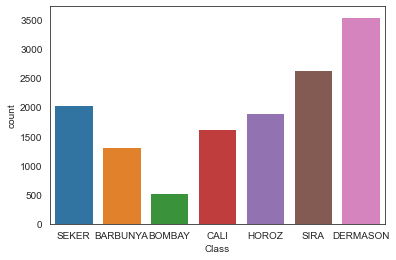

In [11]:
fig = sns.countplot(x='Class', data=data)

* There is 7 Unique types of beans in "Class" Column
* We can notice that there is a slight imbalance in the data we need to handle
* The dataset has an unequal distribution of datapoints in various classes.
* DERMASON is the most dominant class.
* BOMBAY is the most rare class.

### Missing values

In [12]:
data.isna().sum()

Area                  0
Perimeter             0
MajorAxisLength       0
MinorAxisLength    1034
AspectRation          0
Eccentricity          0
ConvexArea          803
EquivDiameter         0
Extent                0
Solidity              0
roundness             0
Compactness        1388
ShapeFactor1        531
ShapeFactor2          0
ShapeFactor3          0
ShapeFactor4       1048
Class                 0
dtype: int64

* There are some missing values in the dataset.
* we have to impute this missing values accordingly.

## Univariant Analysis

### 2- Distribution of numerical features:

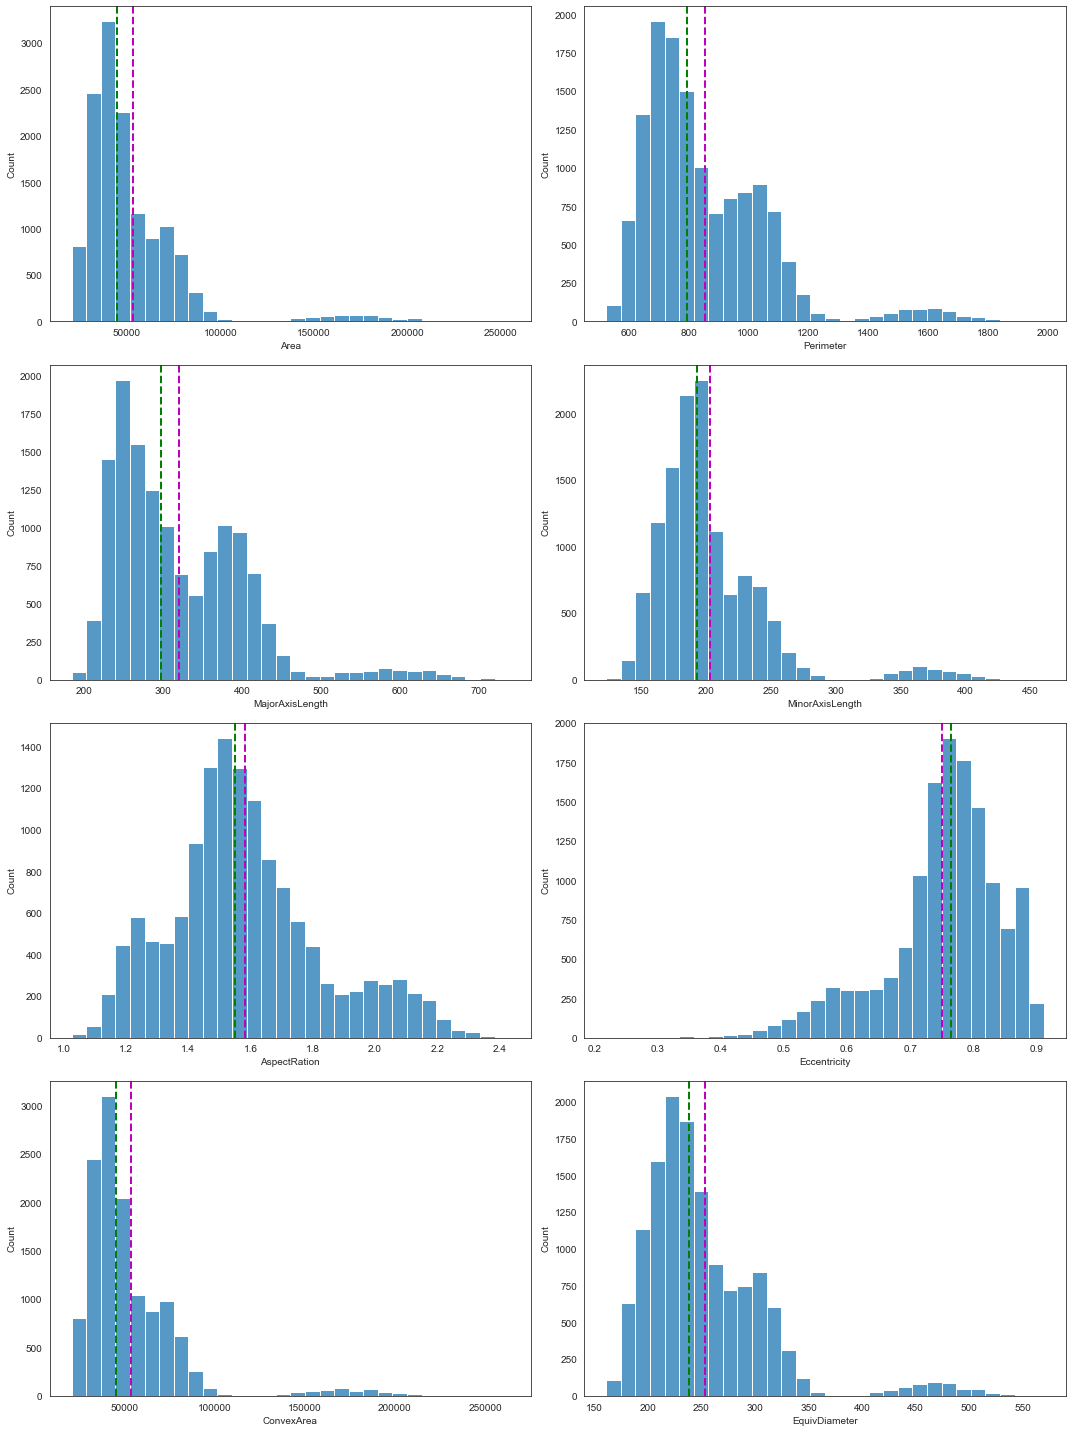

In [13]:
numerical_cols = data.drop(columns=['Class']).columns

fig, ax = plt.subplots(4, 2, figsize=(15, 20))
for variable, subplot in zip(numerical_cols, ax.flatten()):
    g=sns.histplot(data=data,x=variable,bins=30 ,ax=subplot)
    g.axvline(x=data[variable].mean(), color='m', label='Mean', linestyle='--', linewidth=2)
    g.axvline(x=data[variable].median(), color='g', label='Median', linestyle='--', linewidth=2)
plt.tight_layout()
     

* Some distributions have long tails and most are bi-modal which means that some bean classes should be quite distinct from others
* Mostly Skewed multi-modal distributions with possible big percentage of outliers.


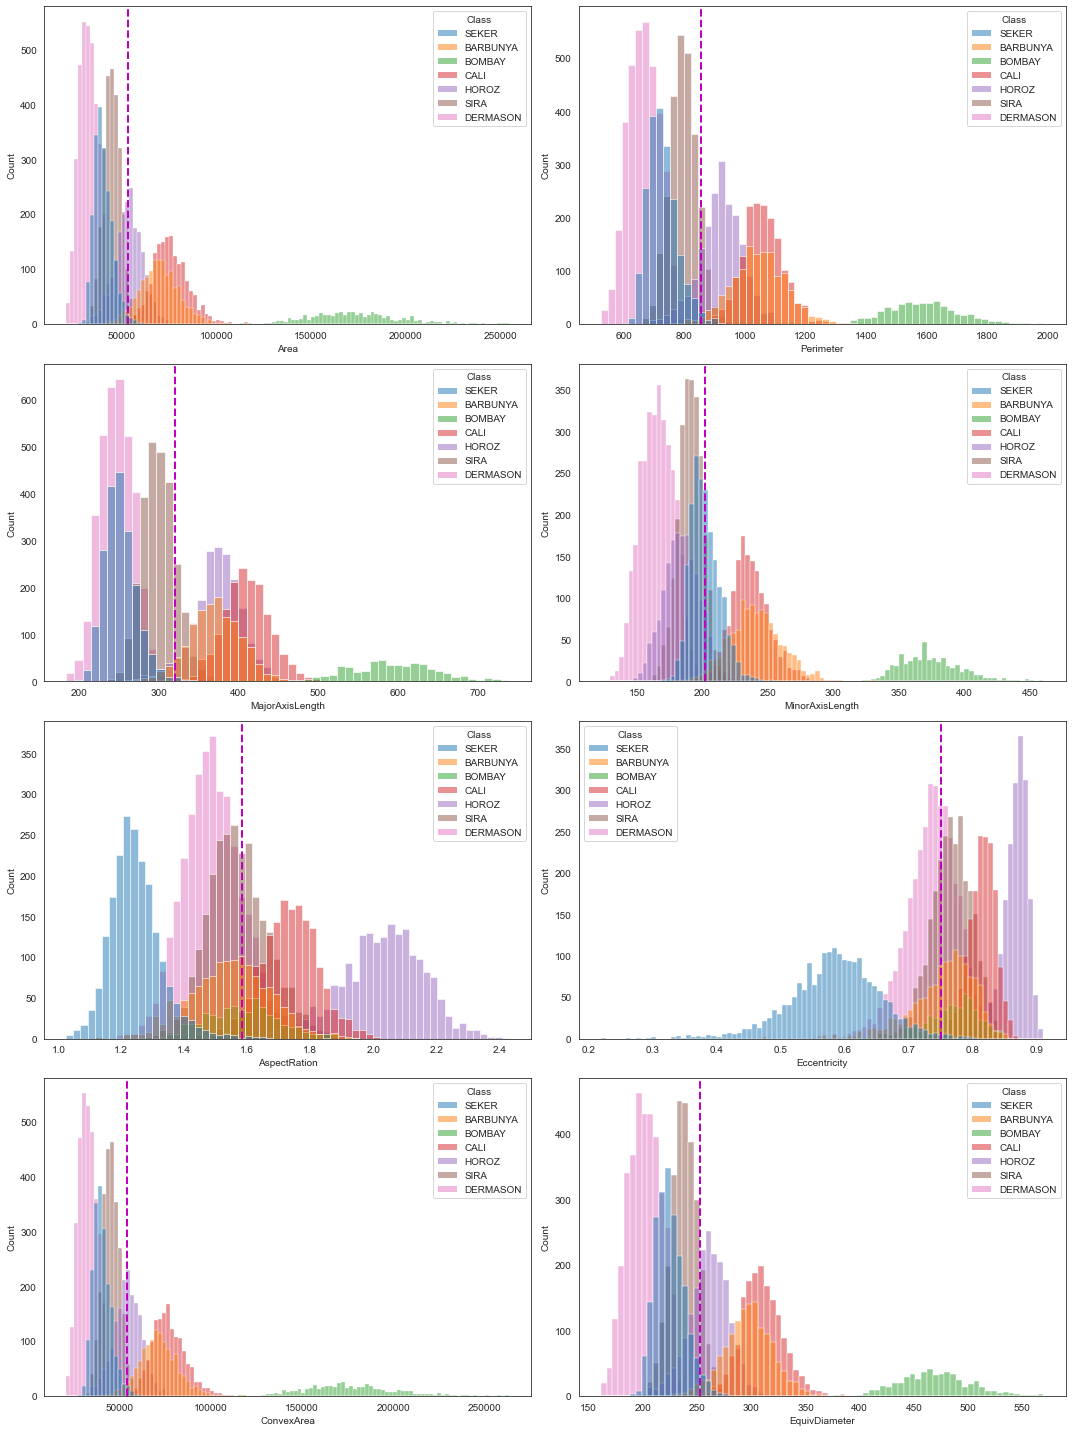

In [14]:
numerical_cols = data.drop(columns=['Class']).columns

fig, ax = plt.subplots(4, 2, figsize=(15, 20))
for variable, subplot in zip(numerical_cols, ax.flatten()):
    g=sns.histplot(data=data,x=variable, ax=subplot,hue='Class')
    #g.lines[0].set_color('crimson')
    g.axvline(x=data[variable].mean(), color='m', label='Mean', linestyle='--', linewidth=2)
plt.tight_layout()

## Bivariant Analysis

### 3- Boxplot of numerical features for each type of bean:

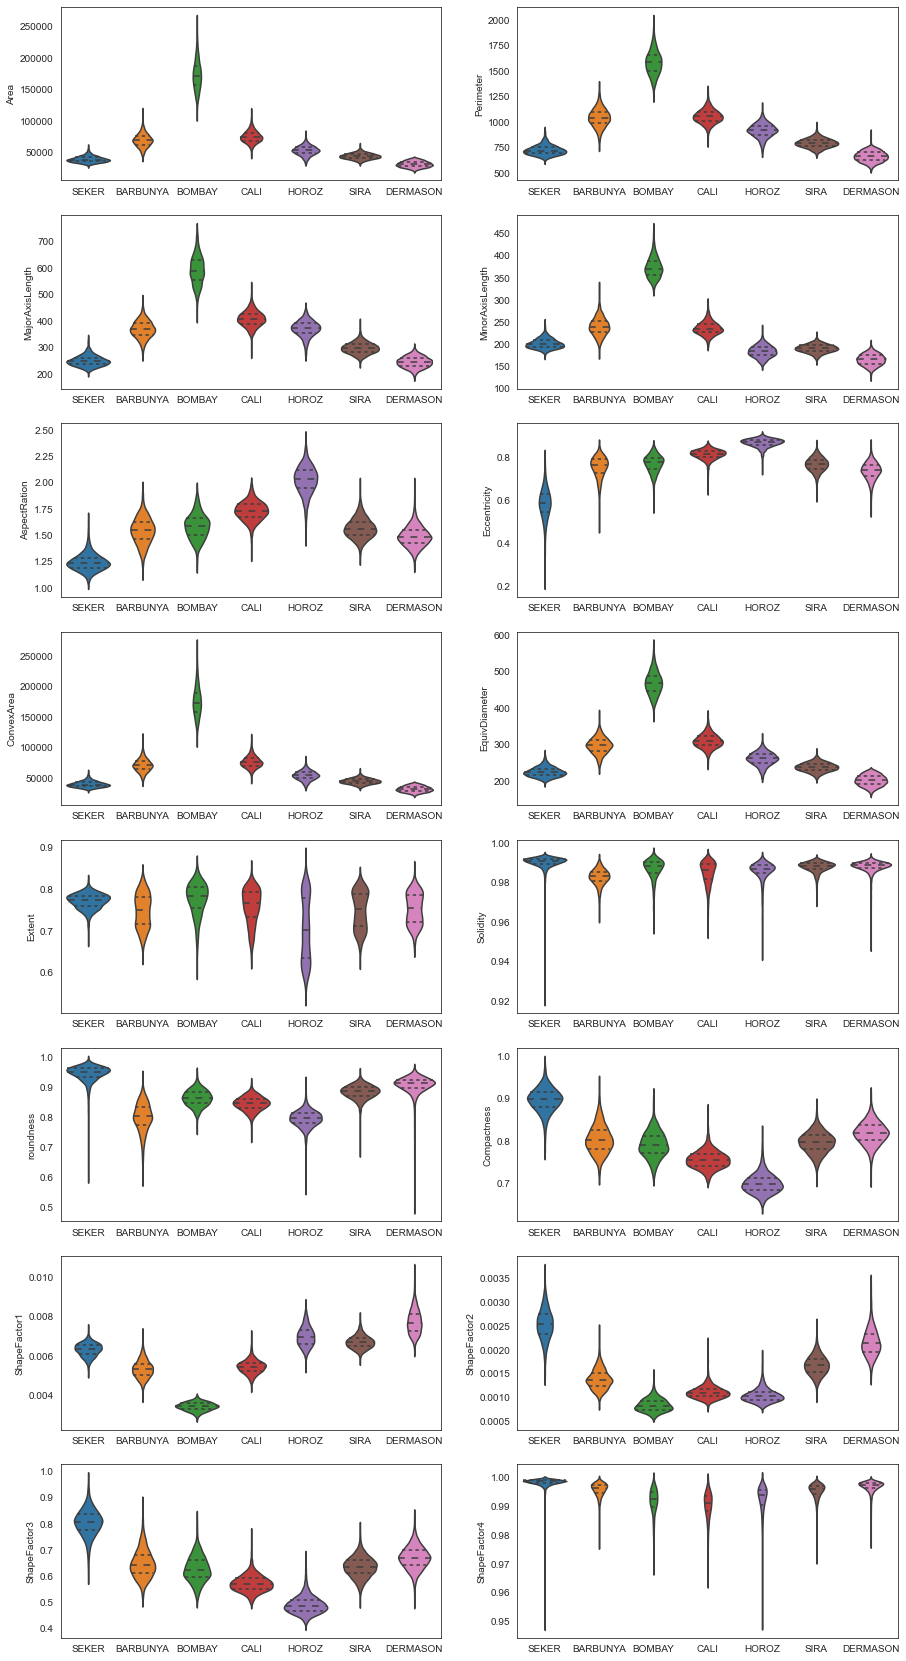

In [15]:
fig,axes=plt.subplots(8,2,figsize=(15,30))

for features,ax in zip(data.columns.drop('Class'),axes.flatten()):
    sns.violinplot(data=data,x='Class',y=features,inner='quartile',ax=ax)
    ax.set(xlabel=None)
plt.show()

* We can notice that the "Bombay" & "Horoz" classes are distinct from other classes.
* Violin plot analysis show there are lot of outliers in some attributes like solidity, roundness , ShapeFactor4

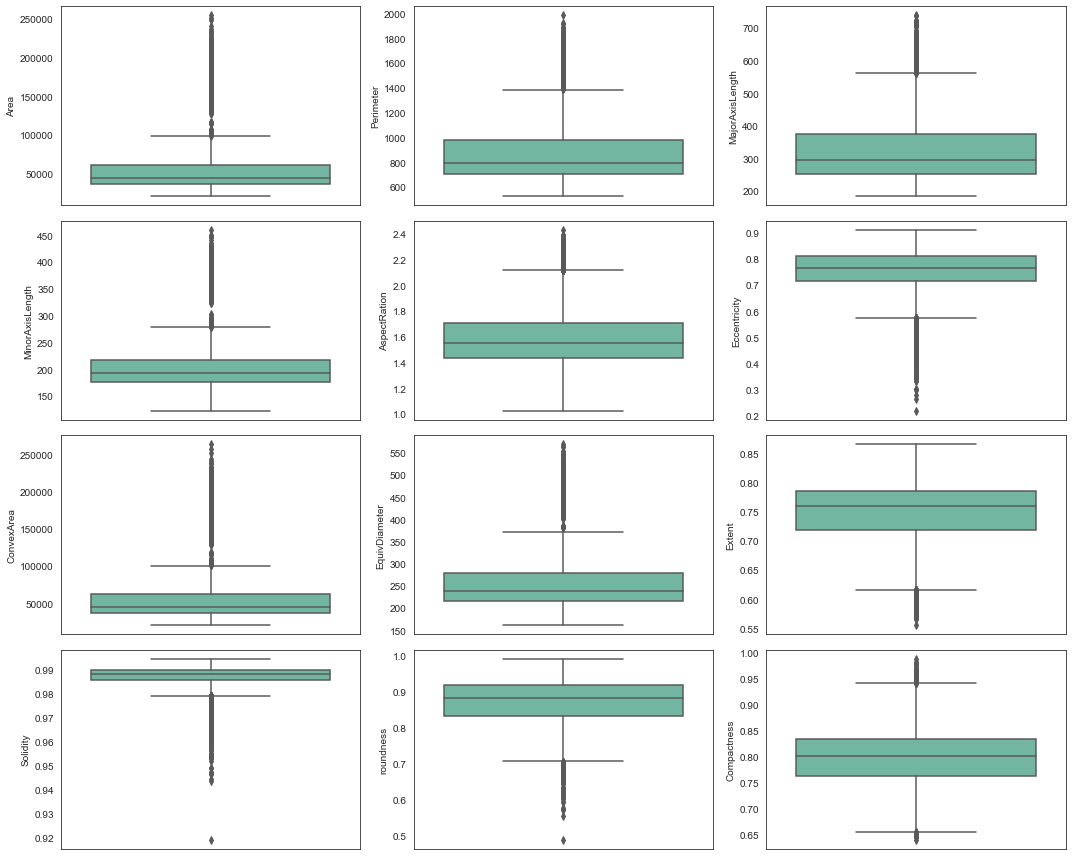

In [16]:
fig, ax = plt.subplots(4, 3, figsize=(15, 12))

for variable, subplot in zip(numerical_cols, ax.flatten()):
    sns.boxplot(y= data[variable], ax=subplot,palette='Set2')
plt.tight_layout()

### 4- Plot Pearson,kendal,spearman linear correlation

<AxesSubplot:>

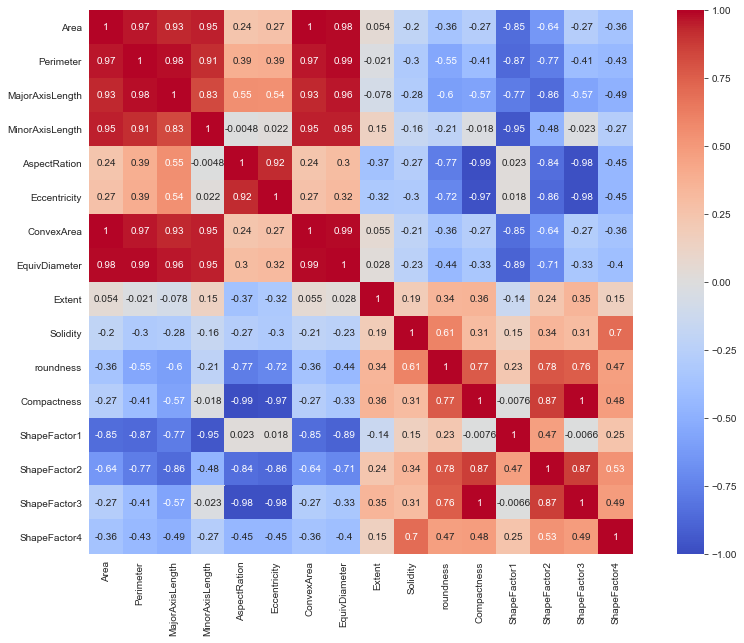

In [17]:
## Pearson Correlation
plt.figure(figsize=(16,10))
sns.heatmap(data.corr("pearson"),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

<AxesSubplot:>

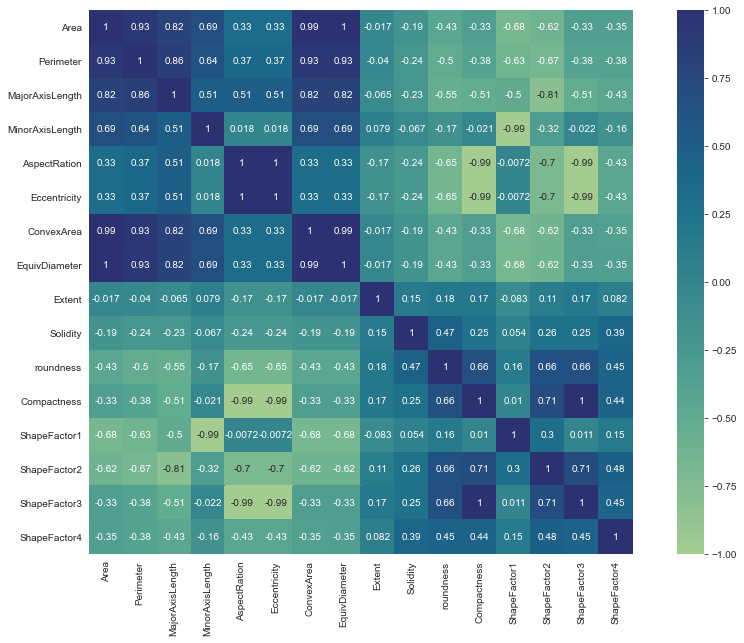

In [18]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr("kendall"),vmin=-1, vmax=1,cmap='crest',annot=True, square=True)

<AxesSubplot:>

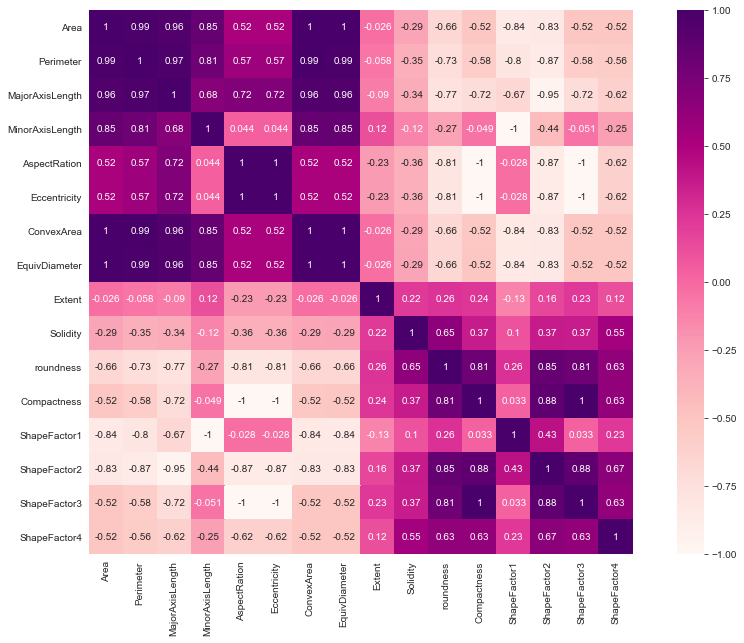

In [19]:
## Spearman Correlation
plt.figure(figsize=(16,10))
sns.heatmap(data.corr("spearman"),vmin=-1, vmax=1,cmap='RdPu',annot=True, square=True)

* __Kendall__ and __Spearman__ correlation seem to have very similar pattern between them, except the slight variation in magnitude of correlation.
* Too many variables with insignificant correlation.

* There a lot of highly correlated attributes in the above correlation matrix:
   * __Area & Convex Area__:1
   * __Shaped Factor3 & Comapctness__:1
   * __Aspect ration & compactness__: -0.99
   * __Area & Perimeter__: 0.97
   * __Perimeter & ShapeFactor1__: -0.87
   * __Aspect ration & Eccentricity__: 0.92


* Some attributes with low level of correlation among them:

   * __Extent & EquivDiameter__: 0.029
   * __Solidity & Eccentricity__: -0.3
   * __Compactnes & Area__: -0.27

## MultiVariant Analysis

### Pair Plot

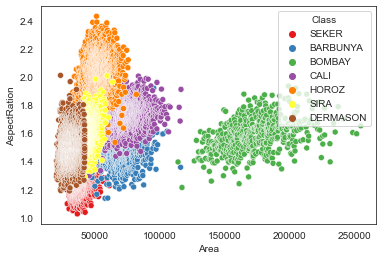

In [20]:
sns.scatterplot(data=data,x='Area',y='AspectRation',hue='Class',palette='Set1')
plt.show()

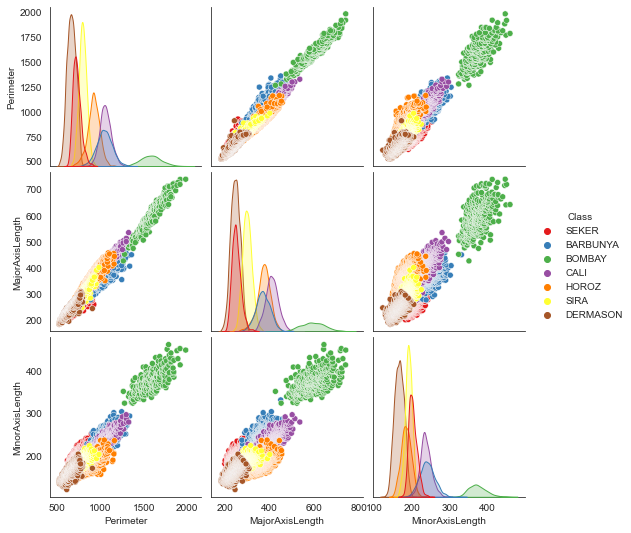

In [21]:
sns.pairplot(data=data[['Perimeter','MajorAxisLength','MinorAxisLength','Class']],hue='Class',palette='Set1')
plt.show()

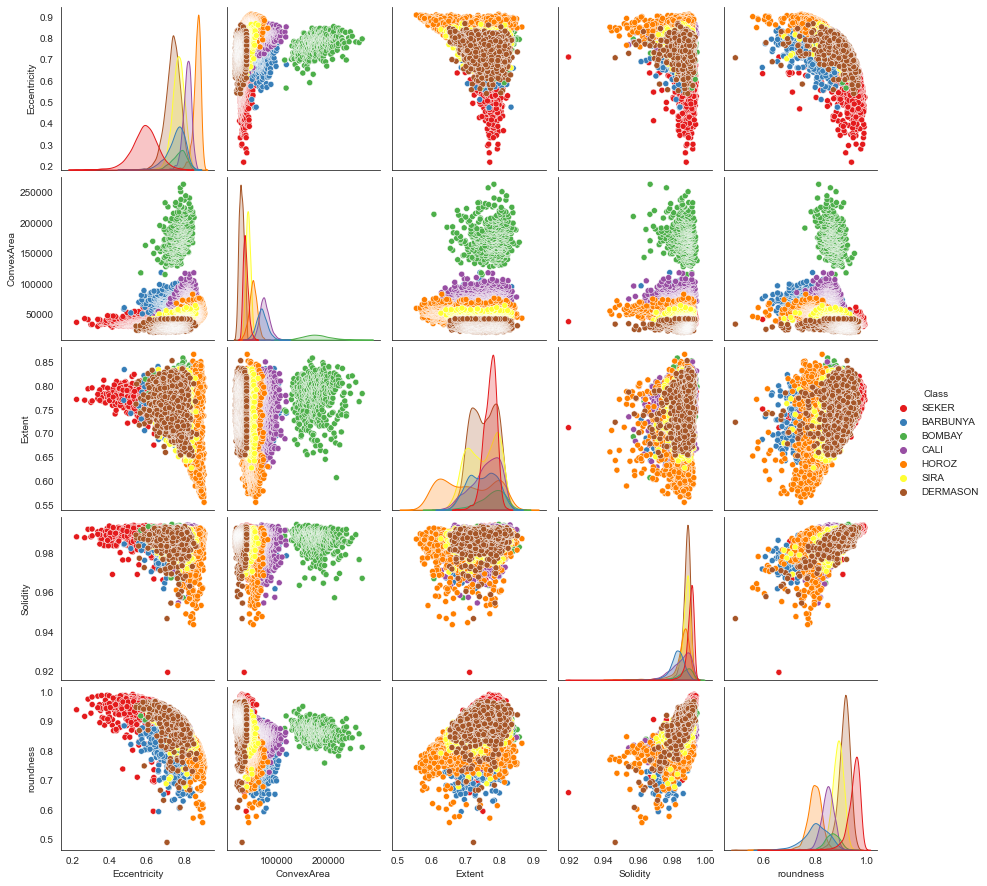

In [22]:
sns.pairplot(data[['Eccentricity','ConvexArea','Extent','Solidity','roundness','Class']],hue='Class',palette='Set1')
plt.show()

### Imputing Missing values

In [23]:
data['MinorAxisLength']=data['MinorAxisLength'].fillna(data['MinorAxisLength'].median())
data['ConvexArea']=data['ConvexArea'].fillna(data['ConvexArea'].median())
data['Compactness']=data['Compactness'].fillna(data['Compactness'].median())
data['ShapeFactor1']=data['ShapeFactor1'].fillna(data['ShapeFactor1'].median())
data['ShapeFactor4']=data['ShapeFactor4'].fillna(data['ShapeFactor4'].median())

### Label Encoding target column

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['Class'] = le.fit_transform(data['Class'])

In [25]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272750,0.783968,0.984986,0.887034,0.801143,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5


### Split the dataset into train test split

In [26]:
x=data.drop(columns='Class')
y=data['Class']

In [27]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,train_size=0.8,random_state=42)
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((10864, 16), (10864,), (2717, 16), (2717,))

## Model Building

### 1. LogisticRegression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [29]:
lg=LogisticRegression()
lg.fit(train_x,train_y)

LogisticRegression()

In [30]:
# Predicting over the Test Set and calculating F1
test_predict = lg.predict(test_x)
# predicted_probability=lg.predict_proba(test_x)
Logistic_f1_score = f1_score(test_predict, test_y,pos_label='positive',average='micro')
print('Test F1 Score    ', Logistic_f1_score )

Test F1 Score     0.5502392344497608


In [31]:
# y_pred_test = lg.predict(xtest)
f1=f1_score(test_predict,test_y,pos_label='positive',average='micro')
f1

0.5502392344497608

In [32]:
# 

In [33]:
from sklearn.metrics import classification_report
k=classification_report(test_y,test_predict)
print(k)

              precision    recall  f1-score   support

           0       0.26      0.04      0.07       267
           1       1.00      1.00      1.00       116
           2       0.55      0.81      0.66       306
           3       0.67      0.85      0.75       697
           4       0.71      0.35      0.47       377
           5       0.03      0.01      0.01       412
           6       0.42      0.73      0.53       542

    accuracy                           0.55      2717
   macro avg       0.52      0.54      0.50      2717
weighted avg       0.49      0.55      0.49      2717



In [34]:
from sklearn.metrics import multilabel_confusion_matrix
CM=multilabel_confusion_matrix(test_y,test_predict)
CM

array([[[2418,   32],
        [ 256,   11]],

       [[2601,    0],
        [   0,  116]],

       [[2210,  201],
        [  59,  247]],

       [[1729,  291],
        [ 105,  592]],

       [[2286,   54],
        [ 244,  133]],

       [[2199,  106],
        [ 409,    3]],

       [[1637,  538],
        [ 149,  393]]], dtype=int64)

* __LogisticRegression__ is give the __F1 score__ is __55.02__
* We will performe other machine learning models and see the results

### ROC-AUC curve

Yellowbrick's  __ROCAUC__ visualizer does allow for plotting multiclass classification curves. ROC curves are typically used in binary classificaiton, and in fact the Scikit-Learn roc_curve metric is only able to perform metrics for binary classifiers. Yellobrick addresses this by binarizing the output (per-class) or to use one-vs-rest(micro score) or one-vs-all(macro score) strategies of classification.

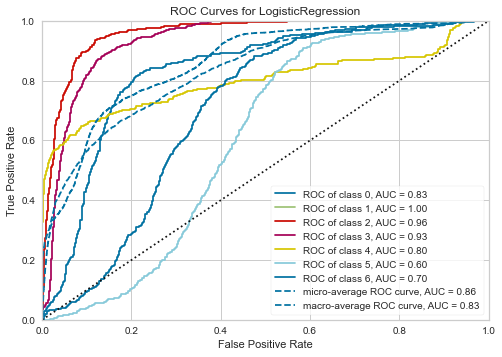

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [35]:
from yellowbrick.classifier import ROCAUC

## Instaniate the classification model and visualizer
visualizer=ROCAUC(lg,classes=[0,1,2,3,4,5,6])
visualizer.fit(train_x,train_y)    # Fit the training data to the visualizer
visualizer.score(test_x,test_y)    # Evaluate the model on the test data
visualizer.show()   # Finalize and render the figure

### Stacking

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [37]:
def model_predictions(model, train_x, train_y, test_x):
    
    #train the model
    model.fit(train_x,train_y)
    
    #storing predictions for train and test
    pred_train=model.predict(train_x)
    pred_test=model.predict(test_x)
    return pred_train, pred_test

In [38]:
#Model 1 - Decision Tree
DT=DecisionTreeClassifier(random_state= 101)
M1_train, M1_test = model_predictions(DT, train_x, train_y, test_x)

In [39]:
#Model 2 - Logistic Regression
LR=LogisticRegression(random_state= 101)
M2_train, M2_test = model_predictions(LR, train_x, train_y, test_x)

In [40]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X=train_x)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [41]:
#Model 3 - k Nearest Neighbour
knn=KNeighborsClassifier()
M3_train, M3_test = model_predictions(knn, train_x, train_y, test_x)

In [42]:
#Creating a New train dataframe
train_prediction = {
              'DT': M1_train,
              'LR': M2_train,
              'knn': M3_train
              }
train_predictions = pd.DataFrame(train_prediction)
train_predictions.head()

,DT,LR,knn
0,6,6,3
1,0,5,0
2,5,6,5
3,5,6,5
4,3,3,3


In [43]:
#Creating a New test dataframe
test_prediction = {
              'DT': M1_test,
              'LR': M2_test,
              'knn': M3_test
              }
test_predictions = pd.DataFrame(test_prediction)
test_predictions.head()

,DT,LR,knn
0,5,6,5
1,4,6,4
2,6,6,6
3,2,5,2
4,4,5,4


In [44]:
# Stacker Model
model = LogisticRegression()
model.fit(train_predictions, train_y)
model.score(test_predictions,test_y)

0.8814869341185131

### 2.  Blending Technique

In [45]:
#importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [46]:
## Define a function to perform blending
def blending(model, train_x, train_y, test_x):
    #train validation split
#     x_train, x_valid, y_train, y_valid = tts(train_x, train_y, random_state=9)
# train_x,test_x,train_y,test_y
    
    #fit on training
    model.fit(train_x, train_y)
    
    #predict on validation and test
    valid_pred = model.predict(test_x)
    score=model.score(test_x, test_y)
    print('Validation Score', score)
    
    test_pred=model.predict(test_x)
    #return validation pred, test pred
    return valid_pred, test_y, test_pred

In [47]:
#Model1 = Logistic Regression
LR=LogisticRegression()
M1_valid, M1_target, M1_test = blending(LR, train_x, train_y, test_x)

Validation Score 0.9208686050791314


In [48]:
#Model 2= Decision Tree
DT=DecisionTreeClassifier()
M2_valid, M2_target, M2_test = blending(DT, train_x, train_y, test_x)

Validation Score 0.8859035701140965


In [49]:
## Scale down the value for KNN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X=train_x)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [50]:
#Model 3 = K Nearest Neighbour
knn=KNeighborsClassifier()
M3_valid, M3_target, M3_test = blending(knn, train_x, train_y, test_x)

Validation Score 0.9146117040853883


In [51]:
valid_prediction = {
              'LR': M1_valid,
              'DT': M2_valid,
              'knn': M3_valid
              }
new_train = pd.DataFrame(valid_prediction)
new_train.head()

,LR,DT,knn
0,5,5,5
1,4,4,4
2,6,6,6
3,2,2,2
4,4,4,4


In [52]:
test_prediction = {
              'LR': M1_test,
              'DT': M2_test,
              'knn': M3_test
              }
new_test = pd.DataFrame(test_prediction)
new_test.head()

,LR,DT,knn
0,5,5,5
1,4,4,4
2,6,6,6
3,2,2,2
4,4,4,4


In [53]:
# Final Model
model1 = DecisionTreeClassifier()
model1.fit(new_train, M1_target)
blending_f1_score=model1.score(new_test,test_y)
blending_f1_score

0.9293338240706662

* After performing the __Blending__ techinque we got the result with approx __92 %__ that preety good score.
* we perform some other Bagging or Boosting techinques and see the result goes up or down.

### Bagging Model

### 1. Random Foreset Classifier

In [54]:
#Importing random forest classifier 
from sklearn.ensemble import RandomForestClassifier

#creating a random forest instance
randForest = RandomForestClassifier(random_state=42)

In [55]:
randForest.fit(train_x,train_y)

RandomForestClassifier(random_state=42)

In [56]:
# Predicting over the Test Set and calculating F1
test_predict = randForest.predict(test_x)

# predicted_probability=lg.predict_proba(test_x)
RandomForest_f1_score = f1_score(test_predict, test_y,pos_label='positive',average='micro')
print('Test F1 Score    ', RandomForest_f1_score )

Test F1 Score     0.9193963930806036


* After performing the __RandomForest__ Technique we got the score is __91%.__
* We perform some model __Hyperparameter tunning__ and to increase the model performance

### Model Tunning

In [57]:
param_grid={
    'n_estimators':[10,30,50,100,200],
    'max_features':[2,4,5,6],
    'min_samples_leaf':[1,2,4,5],
    'max_depth':[5,6,7]
}

In [58]:
from sklearn.model_selection import RandomizedSearchCV
rand=RandomizedSearchCV(randForest,param_grid,scoring='accuracy',n_jobs=-1,random_state=96)
search=rand.fit(train_x,train_y)

In [59]:
print("Best Score: %s" % rand.best_score_)
print("Best Hyperparameters: %s" % search.best_params_)

Best Score: 0.9106222864063312
Best Hyperparameters: {'n_estimators': 30, 'min_samples_leaf': 5, 'max_features': 5, 'max_depth': 7}


In [60]:
#creating a random forest instance
randForest = RandomForestClassifier(random_state=42,n_estimators=30,min_samples_leaf=5,max_features=5,max_depth=7)

In [61]:
randForest.fit(train_x,train_y)

RandomForestClassifier(max_depth=7, max_features=5, min_samples_leaf=5,
                       n_estimators=30, random_state=42)

In [62]:
randForest.score(train_x,train_y)

0.9228645066273933

In [63]:
## RandomForest score
RandomForest_f1_score=rand.best_score_
RandomForest_f1_score

0.9106222864063312

In [64]:
# Predicting over the Test Set and calculating F1
test_predict = randForest.predict(test_x)

# predicted_probability=lg.predict_proba(test_x)
RandomForest_f1_score = f1_score(test_predict, test_y,pos_label='positive',average='micro')
print('Test F1 Score    ', RandomForest_f1_score )

Test F1 Score     0.9057784320942216


In [65]:
from sklearn.metrics import classification_report
k=classification_report(test_y,test_predict)
print(k)

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       267
           1       1.00      1.00      1.00       116
           2       0.87      0.93      0.90       306
           3       0.90      0.92      0.91       697
           4       0.96      0.93      0.94       377
           5       0.94      0.93      0.94       412
           6       0.85      0.87      0.86       542

    accuracy                           0.91      2717
   macro avg       0.92      0.91      0.92      2717
weighted avg       0.91      0.91      0.91      2717



In [66]:
from sklearn.metrics import multilabel_confusion_matrix
CM=multilabel_confusion_matrix(test_y,test_predict)
CM

array([[[2429,   21],
        [  49,  218]],

       [[2601,    0],
        [   0,  116]],

       [[2370,   41],
        [  22,  284]],

       [[1948,   72],
        [  57,  640]],

       [[2327,   13],
        [  28,  349]],

       [[2282,   23],
        [  30,  382]],

       [[2089,   86],
        [  70,  472]]], dtype=int64)

* After performing the __HyperParameter__ model we got the approx score __91%__.

In [67]:
#looking at the feature importance
randForest.feature_importances_

array([0.07338997, 0.12990879, 0.12933697, 0.02993108, 0.11012673,
       0.09387942, 0.02263546, 0.06614858, 0.00208528, 0.00461866,
       0.03312592, 0.02228597, 0.0630931 , 0.03546365, 0.17159115,
       0.01237925])

In [68]:
#feature importance against each variable
pd.Series(randForest.feature_importances_, index=x.columns)

Area               0.073390
Perimeter          0.129909
MajorAxisLength    0.129337
MinorAxisLength    0.029931
AspectRation       0.110127
Eccentricity       0.093879
ConvexArea         0.022635
EquivDiameter      0.066149
Extent             0.002085
Solidity           0.004619
roundness          0.033126
Compactness        0.022286
ShapeFactor1       0.063093
ShapeFactor2       0.035464
ShapeFactor3       0.171591
ShapeFactor4       0.012379
dtype: float64

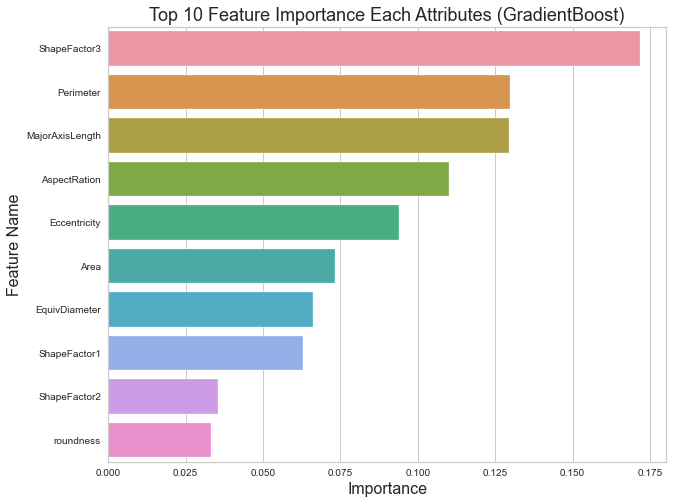

In [69]:
imp_df=pd.DataFrame({
    'Feature Name':x.columns,
    'Importance':randForest.feature_importances_
})
fig1=imp_df.sort_values(by='Importance',ascending=False)

fig2=fig1.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fig2,x='Importance',y='Feature Name')
plt.title("Top 10 Feature Importance Each Attributes (GradientBoost)",fontsize=18)
plt.xlabel("Importance",fontsize=16)
plt.ylabel('Feature Name',fontsize=16)
plt.show()

* After calculating the __FeaureImportance__ of the __RandomForest Model__,we conclue that:
    * __Perimeter, ShapeFactor3, Area, MajorAxisLength, AspectRation, Eccentricity, EquivDiameter, Roundness, ShapeFactor1__ are the most important features for the types of beans

### ROC-AUC curve

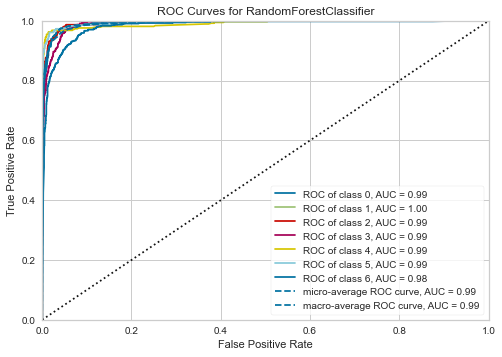

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [70]:
visualizer=ROCAUC(randForest,classes=[0,1,2,3,4,5,6])
visualizer.fit(train_x,train_y)
visualizer.score(test_x,test_y)
visualizer.show()

### Boosting Model

### 1. AdaBoost

In [71]:
#Importing AdaBoost Classifier 
from sklearn.ensemble import AdaBoostClassifier

#creating an AdaBoost instance
adaBoost = AdaBoostClassifier(random_state=96)

In [72]:
#training the model
adaBoost.fit(train_x,train_y)

AdaBoostClassifier(random_state=96)

In [73]:
# Predicting over the Test Set and calculating F1
test_predict = adaBoost.predict(test_x)

# predicted_probability=lg.predict_proba(test_x)
adaBoost_f1_score = f1_score(test_predict, test_y,pos_label='positive',average='micro')
print('Test F1 Score    ', adaBoost_f1_score )

Test F1 Score     0.624585940375414


### Model Tunning for AdaBoost

In [74]:
adaBoost = AdaBoostClassifier( base_estimator=RandomForestClassifier(random_state=101),
                         n_estimators=100, learning_rate=0.01)

In [75]:
#training the model
adaBoost.fit(train_x,train_y)

AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=101),
                   learning_rate=0.01, n_estimators=100)

In [76]:
#calculating score on test data
adaBoost.score(test_x, test_y)

0.9230769230769231

In [77]:
# Predicting over the Test Set and calculating F1
test_predict = adaBoost.predict(test_x)

# predicted_probability=lg.predict_proba(test_x)
adaBoost_f1_score = f1_score(test_predict, test_y,pos_label='positive',average='micro')
print('Test F1 Score    ', adaBoost_f1_score )

Test F1 Score     0.9230769230769231


In [78]:
from sklearn.metrics import classification_report
k=classification_report(test_y,test_predict)
print(k)

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       267
           1       1.00      1.00      1.00       116
           2       0.93      0.93      0.93       306
           3       0.90      0.93      0.92       697
           4       0.95      0.95      0.95       377
           5       0.95      0.94      0.94       412
           6       0.88      0.87      0.88       542

    accuracy                           0.92      2717
   macro avg       0.94      0.93      0.93      2717
weighted avg       0.92      0.92      0.92      2717



In [79]:
from sklearn.metrics import multilabel_confusion_matrix
CM=multilabel_confusion_matrix(test_y,test_predict)
CM

array([[[2434,   16],
        [  28,  239]],

       [[2601,    0],
        [   0,  116]],

       [[2388,   23],
        [  20,  286]],

       [[1951,   69],
        [  46,  651]],

       [[2323,   17],
        [  20,  357]],

       [[2284,   21],
        [  25,  387]],

       [[2112,   63],
        [  70,  472]]], dtype=int64)

In [80]:
# adaBoost.feature_importance_
adaBoost.feature_importances_

array([0.06551421, 0.11021211, 0.09590388, 0.03360701, 0.07672936,
       0.09751577, 0.0408265 , 0.08711581, 0.01192137, 0.01644401,
       0.05565424, 0.03644902, 0.06927835, 0.04326334, 0.13276408,
       0.02680095])

In [81]:
#feature importance against each variable
pd.Series(adaBoost.feature_importances_,index=x.columns)
# pd.Series(adaBoost.feature_importances_, index=x.columns,columns=['importance']).sort_values('importance',ascending=False)

Area               0.065514
Perimeter          0.110212
MajorAxisLength    0.095904
MinorAxisLength    0.033607
AspectRation       0.076729
Eccentricity       0.097516
ConvexArea         0.040826
EquivDiameter      0.087116
Extent             0.011921
Solidity           0.016444
roundness          0.055654
Compactness        0.036449
ShapeFactor1       0.069278
ShapeFactor2       0.043263
ShapeFactor3       0.132764
ShapeFactor4       0.026801
dtype: float64

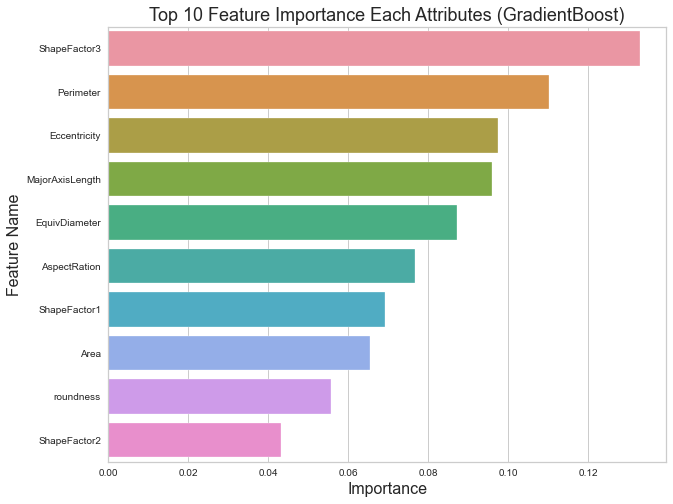

In [82]:
imp_df=pd.DataFrame({
    'Feature Name':x.columns,
    'Importance':adaBoost.feature_importances_
})
fig1=imp_df.sort_values(by='Importance',ascending=False)

fig2=fig1.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fig2,x='Importance',y='Feature Name')
plt.title("Top 10 Feature Importance Each Attributes (GradientBoost)",fontsize=18)
plt.xlabel("Importance",fontsize=16)
plt.ylabel('Feature Name',fontsize=16)
plt.show()

* After calculating the __FeaureImportance__ of the __AdaBoost Model__,we conclue that:
    * __Perimeter, Extent, ShapeFactor3, Area, MajorAxisLength__ are the most import features for the types of beans

### ROC-AUC Curve

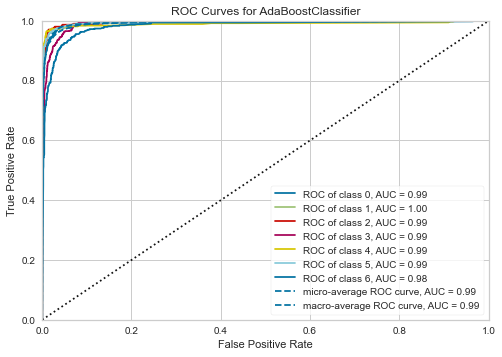

<AxesSubplot:title={'center':'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [83]:
visualizer=ROCAUC(adaBoost,classes=[0,1,2,3,4,5,6])
visualizer.fit(train_x,train_y)
visualizer.score(test_x,test_y)
visualizer.show()

### 2. Gradient Boosting

In [84]:
#Importing GBDT Classifier 
from sklearn.ensemble import GradientBoostingClassifier

#creating an Gradient boosting instance
gbc = GradientBoostingClassifier(random_state=96)

In [85]:
#training the model
gbc.fit(train_x,train_y)

GradientBoostingClassifier(random_state=96)

In [86]:
# Predicting over the Test Set and calculating F1
test_predict = gbc.predict(test_x)

# predicted_probability=lg.predict_proba(test_x)
gradient_f1_score = f1_score(test_predict, test_y,pos_label='positive',average='micro')
print('Test F1 Score    ', gradient_f1_score )

Test F1 Score     0.9223408170776591


### Model Tunning for GradientBoosting Classifier

1. **n_estimators:** Total number of trees.
2. **loss:** The loss function to be minimized. 
3. **subsample:**The fraction of observations to be selected for each tree. Selection is done by random sampling.
4. **random_state:** The random number seed so that same random numbers are generated every time.
5. **learning_rate:** This determines the impact of each tree on the final outcome 

In [87]:
param_grid={
    'n_estimators':[10,30,50,100,200],
    'max_features':[2,4,5,6],
    'min_samples_leaf':[1,2,4,5],
    'max_depth':[5,6,7]
}

In [88]:
from sklearn.model_selection import RandomizedSearchCV
rand=RandomizedSearchCV(gbc,param_grid,scoring='accuracy',n_jobs=-1,random_state=96)
search=rand.fit(train_x,train_y)

In [89]:
print("Best Score: %s" % rand.best_score_)
print("Best Hyperparameters: %s" % search.best_params_)

Best Score: 0.9252574921245929
Best Hyperparameters: {'n_estimators': 100, 'min_samples_leaf': 4, 'max_features': 4, 'max_depth': 5}


In [90]:
# #creating an Gradient boosting instance
gbc = GradientBoostingClassifier(random_state=96, n_estimators=100,min_samples_leaf=4,max_features=4,max_depth=5 ,subsample=0.7,learning_rate=0.01)

In [91]:
gbc.fit(train_x,train_y)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, max_features=4,
                           min_samples_leaf=4, random_state=96, subsample=0.7)

In [92]:
# Predicting over the Test Set and calculating F1
test_predict = gbc.predict(test_x)

# predicted_probability=lg.predict_proba(test_x)
gradient_f1_score = f1_score(test_predict, test_y,pos_label='positive',average='micro')
print('Test F1 Score    ', gradient_f1_score )

Test F1 Score     0.9142436510857562


In [93]:
from sklearn.metrics import classification_report
k=classification_report(test_y,test_predict)
print(k)

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       267
           1       1.00      1.00      1.00       116
           2       0.91      0.94      0.92       306
           3       0.90      0.92      0.91       697
           4       0.96      0.93      0.95       377
           5       0.95      0.93      0.94       412
           6       0.85      0.87      0.86       542

    accuracy                           0.91      2717
   macro avg       0.93      0.92      0.93      2717
weighted avg       0.92      0.91      0.91      2717



In [94]:
from sklearn.metrics import multilabel_confusion_matrix
CM=multilabel_confusion_matrix(test_y,test_predict)
CM

array([[[2437,   13],
        [  39,  228]],

       [[2601,    0],
        [   0,  116]],

       [[2382,   29],
        [  18,  288]],

       [[1947,   73],
        [  53,  644]],

       [[2327,   13],
        [  26,  351]],

       [[2286,   19],
        [  29,  383]],

       [[2089,   86],
        [  68,  474]]], dtype=int64)

In [95]:
# adaBoost.feature_importance_
gbc.feature_importances_

array([0.1073932 , 0.07722158, 0.05328471, 0.03644598, 0.08422783,
       0.10172529, 0.04306233, 0.11087028, 0.00389186, 0.00873224,
       0.073909  , 0.04544771, 0.05415944, 0.06362861, 0.11816587,
       0.01783406])

In [96]:
#feature importance against each variable
pd.Series(gbc.feature_importances_,index=x.columns)

Area               0.107393
Perimeter          0.077222
MajorAxisLength    0.053285
MinorAxisLength    0.036446
AspectRation       0.084228
Eccentricity       0.101725
ConvexArea         0.043062
EquivDiameter      0.110870
Extent             0.003892
Solidity           0.008732
roundness          0.073909
Compactness        0.045448
ShapeFactor1       0.054159
ShapeFactor2       0.063629
ShapeFactor3       0.118166
ShapeFactor4       0.017834
dtype: float64

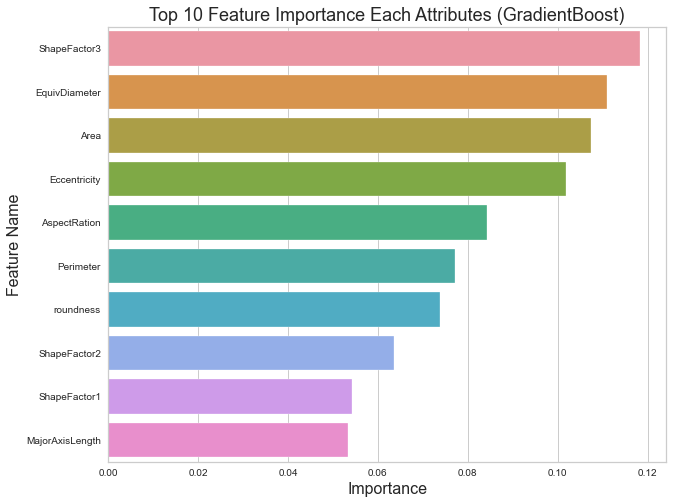

In [97]:
imp_df=pd.DataFrame({
    'Feature Name':x.columns,
    'Importance':gbc.feature_importances_
})
fig1=imp_df.sort_values(by='Importance',ascending=False)

fig2=fig1.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fig2,x='Importance',y='Feature Name')
plt.title("Top 10 Feature Importance Each Attributes (GradientBoost)",fontsize=18)
plt.xlabel("Importance",fontsize=16)
plt.ylabel('Feature Name',fontsize=16)
plt.show()

### ROC-Curve

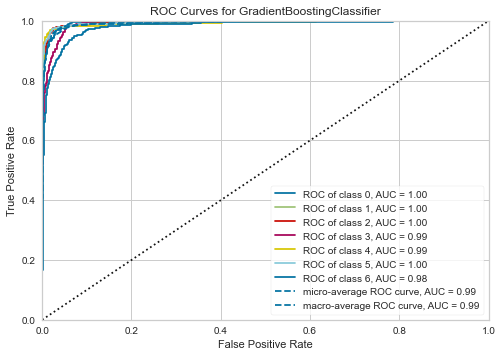

<AxesSubplot:title={'center':'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [98]:
visualizer=ROCAUC(gbc,classes=[0,1,2,3,4,5,6])
visualizer.fit(train_x,train_y)
visualizer.score(test_x,test_y)
visualizer.show()

* From this __AUC-ROC__ we conclude that apart from the imbalanced classes the model is easily diffrentiate the classes and predict perfectly.

### Results of the Model.

In [99]:
results_df = pd.DataFrame({'Logistic_Regression':[Logistic_f1_score], 'Blending': [blending_f1_score],'RandomForest':[RandomForest_f1_score],'AdaBoost':[adaBoost_f1_score],'GradientBoostingClassifier':[gradient_f1_score]})

In [103]:
results_df=results_df.round(decimals=3)

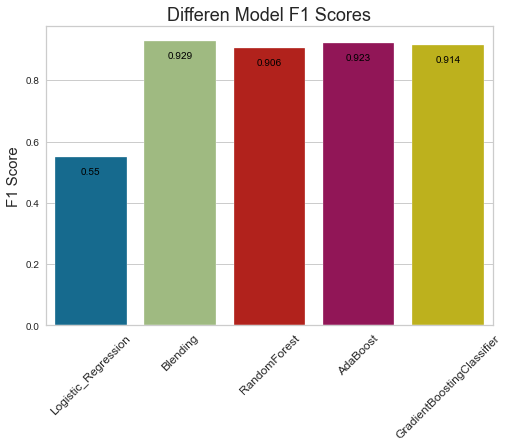

In [107]:
ax=sns.barplot(data=results_df)
plt.xticks(rotation=45,fontsize=12)
plt.title('Differen Model F1 Scores',fontsize=18)
plt.ylabel('F1 Score',fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',(p.get_x()+0.4, p.get_height()),ha='center',va='top',color='black',size=10)


* Here, we conclude that almost every model give prediction is __91%.__
* __Blending technique__ and __AdaBoost__ gives the __F1 score__ is 92% .